# Load Packages 

In [1]:
Threads.nthreads()

6

In [2]:
using Plots
using Clustering
using ParallelKMeans
using Random
using BenchmarkTools
using DelimitedFiles

In [3]:
# Read same data as constructed by Sklearn
X = DelimitedFiles.readdlm("data.csv", ',', Float64);

In [4]:
size(X)

(1000000, 30)

In [5]:
# Read same data as transposed matrix since the APIs expect column major data 
X = permutedims(X);

In [6]:
size(X)

(30, 1000000)

## Benchmark Clustering

In [7]:
@benchmark [Clustering.kmeans(X, i; tol=1e-6, maxiter=1000).totalcost for i = 2:10] samples=7 seconds=6000

BenchmarkTools.Trial: 
  memory estimate:  30.74 GiB
  allocs estimate:  28871
  --------------
  minimum time:     494.199 s (0.57% GC)
  median time:      568.866 s (0.58% GC)
  mean time:        575.836 s (0.57% GC)
  maximum time:     673.697 s (0.56% GC)
  --------------
  samples:          7
  evals/sample:     1

In [8]:
a = [Clustering.kmeans(X, i; tol=1e-6, maxiter=1000).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.437390076461708e6 
 2.399396343523165e6 
 2.368981929645847e6 
 2.346479619634827e6 
 2.3270692873300132e6
 2.309786084836961e6 
 2.293588680347211e6 
 2.2805691238881266e6
 2.2681818268361306e6

## Benchmark ParallelKMeans Single-Thread

In [9]:
@benchmark [ParallelKMeans.kmeans(Lloyd(), X, i; n_threads=1,
            tol=1e-6, max_iters=1000, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=3000

BenchmarkTools.Trial: 
  memory estimate:  206.17 MiB
  allocs estimate:  7260
  --------------
  minimum time:     163.941 s (0.01% GC)
  median time:      190.126 s (0.01% GC)
  mean time:        187.360 s (0.01% GC)
  maximum time:     210.928 s (0.00% GC)
  --------------
  samples:          7
  evals/sample:     1

In [10]:
b = [ParallelKMeans.kmeans(Lloyd(), X, i; n_threads=1,
     tol=1e-6, max_iters=1000).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.437514416262046e6 
 2.3995370679358235e6
 2.3690019222622677e6
 2.3465732926607905e6
 2.3270180614927076e6
 2.3098801455078917e6
 2.294310316847071e6 
 2.2808372502804855e6
 2.268399131598535e6 

In [11]:
@benchmark [ParallelKMeans.kmeans(LightElkan(), X, i; n_threads=1,
            tol=1e-6, max_iters=1000, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=6000

BenchmarkTools.Trial: 
  memory estimate:  206.18 MiB
  allocs estimate:  7395
  --------------
  minimum time:     184.631 s (0.01% GC)
  median time:      208.510 s (0.01% GC)
  mean time:        203.749 s (0.01% GC)
  maximum time:     220.027 s (0.01% GC)
  --------------
  samples:          7
  evals/sample:     1

In [12]:
c = [ParallelKMeans.kmeans(LightElkan(), X, i; n_threads=1,
     tol=1e-6, max_iters=1000).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.4373992366501396e6
 2.3993828914133427e6
 2.3699108582634362e6
 2.3466090317997118e6
 2.327162288785896e6 
 2.3099729001667714e6
 2.2934437986716884e6
 2.2809830738147544e6
 2.2682155492295297e6

## Benchmark ParallelKMeans Multi-Thread

In [13]:
@benchmark [ParallelKMeans.kmeans(LightElkan(), X, i; n_threads=6,
            tol=1e-6, max_iters=1000, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=6000

BenchmarkTools.Trial: 
  memory estimate:  210.48 MiB
  allocs estimate:  65569
  --------------
  minimum time:     34.018 s (0.03% GC)
  median time:      37.936 s (0.03% GC)
  mean time:        37.592 s (0.07% GC)
  maximum time:     41.411 s (0.02% GC)
  --------------
  samples:          7
  evals/sample:     1

In [14]:
d = [ParallelKMeans.kmeans(LightElkan(), X, i; n_threads=6,
     tol=1e-6, max_iters=1000).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.4375580873487955e6
 2.3995160609520474e6
 2.368962262571054e6 
 2.3467149070056914e6
 2.327228708040312e6 
 2.309824147290834e6 
 2.2936519684780794e6
 2.2807928288857755e6
 2.268131643419314e6 

In [15]:
@benchmark [ParallelKMeans.kmeans(Lloyd(), X, i; n_threads=6,
            tol=1e-6, max_iters=1000, verbose=false).totalcost 
            for i = 2:10] samples=7 seconds=6000

BenchmarkTools.Trial: 
  memory estimate:  210.36 MiB
  allocs estimate:  63338
  --------------
  minimum time:     30.821 s (0.03% GC)
  median time:      34.396 s (0.03% GC)
  mean time:        35.749 s (0.04% GC)
  maximum time:     41.924 s (0.03% GC)
  --------------
  samples:          7
  evals/sample:     1

In [16]:
e = [ParallelKMeans.kmeans(Lloyd(), X, i; n_threads=6,
     tol=1e-6, max_iters=1000).totalcost for i = 2:10]

9-element Array{Float64,1}:
 2.437560717039972e6 
 2.399378278471072e6 
 2.36919832139996e6  
 2.346553388108425e6 
 2.32708148563704e6  
 2.309755782764256e6 
 2.2938101020879154e6
 2.2808561640864206e6
 2.2681825716545912e6

# Check For Cost For Each Implementation

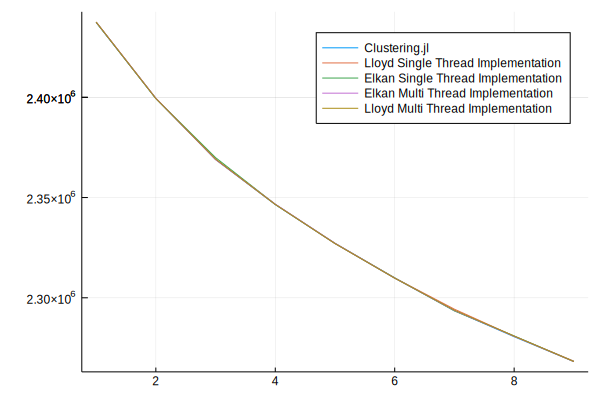

In [17]:
plot(a, label="Clustering.jl")
plot!(b, label="Lloyd Single Thread Implementation")
plot!(c, label="Elkan Single Thread Implementation")
plot!(d, label="Elkan Multi Thread Implementation")
plot!(e, label="Lloyd Multi Thread Implementation")